In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def cost(x):
    return np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-3*x[1]-0.1)+np.exp(-x[0]-0.1)

In [26]:
def gradient(x):
    gradien_x=[]
    gradien_x.append(np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-3*x[1]-0.1)-np.exp(-x[0]-0.1))
    gradien_x.append(3*np.exp(x[0]+3*x[1]-0.1)-3*np.exp(x[0]-3*x[1]-0.1))
    return np.array(gradien_x)

In [29]:
def quadratic_problem2d(Lambda):
    A = np.random.rand(2,2)
    Q,R = np.linalg.qr(A)
    L = np.diag(Lambda)
    P = Q.T@L@Q
    # with P definite positive
    q = np.random.rand(2)
    r = np.random.rand(1) 
    return P,q,r

In [43]:
def backtrak(x_k,d,sig):
    rho=1e-3
    c=1e-4
    if cost(x_k+sig*d)>cost(x_k)+c*sig*gradient(x_k)@d :
        sig=backtrak(x_k,d,rho*sig)
    else:
        return sig

In [78]:
def methode_desscente(x0,cost,gradient,type="backtrack",epsilon=1e-6,max_iter=1e5,rho=1e-3,c=1e-4,sig=1e-2):
    k=0
    xlist=[]
    flist=[]
    nlist=[]
    
    while np.linalg.norm(gradient(x0))>epsilon and k<max_iter:
        d_k=-gradient(x0)
        if type=="backtrack":
         step=backtrak(x0,d_k,sig)
        else:
            step=metho_Golden(lambda sigma : cost(x0 +sigma*d_k),0,1,1e-12)
        x0=x0+step*d_k
        k=k+1
        nlist.append(np.linalg.norm(gradient(x0)))
        xlist.append(x0)
        flist.append(cost(x0)) 
    return xlist,flist,nlist

In [79]:
def metho_Golden(f,a,b,epsilon):
    fi=((1+np.sqrt(5))/2)+1
    c=a+(b-a)/(fi)
    d=b-(b-a)/(fi)
    while b-a>epsilon:
        if f(c)>=f(d):
            a=c
            c=d
            d=b-(b-a)/(fi+1)
        else:
            b=d
            d=c
            c=a+(b-a)/(fi+1)
    return (a+b)/2

<Figure size 1800x1000 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


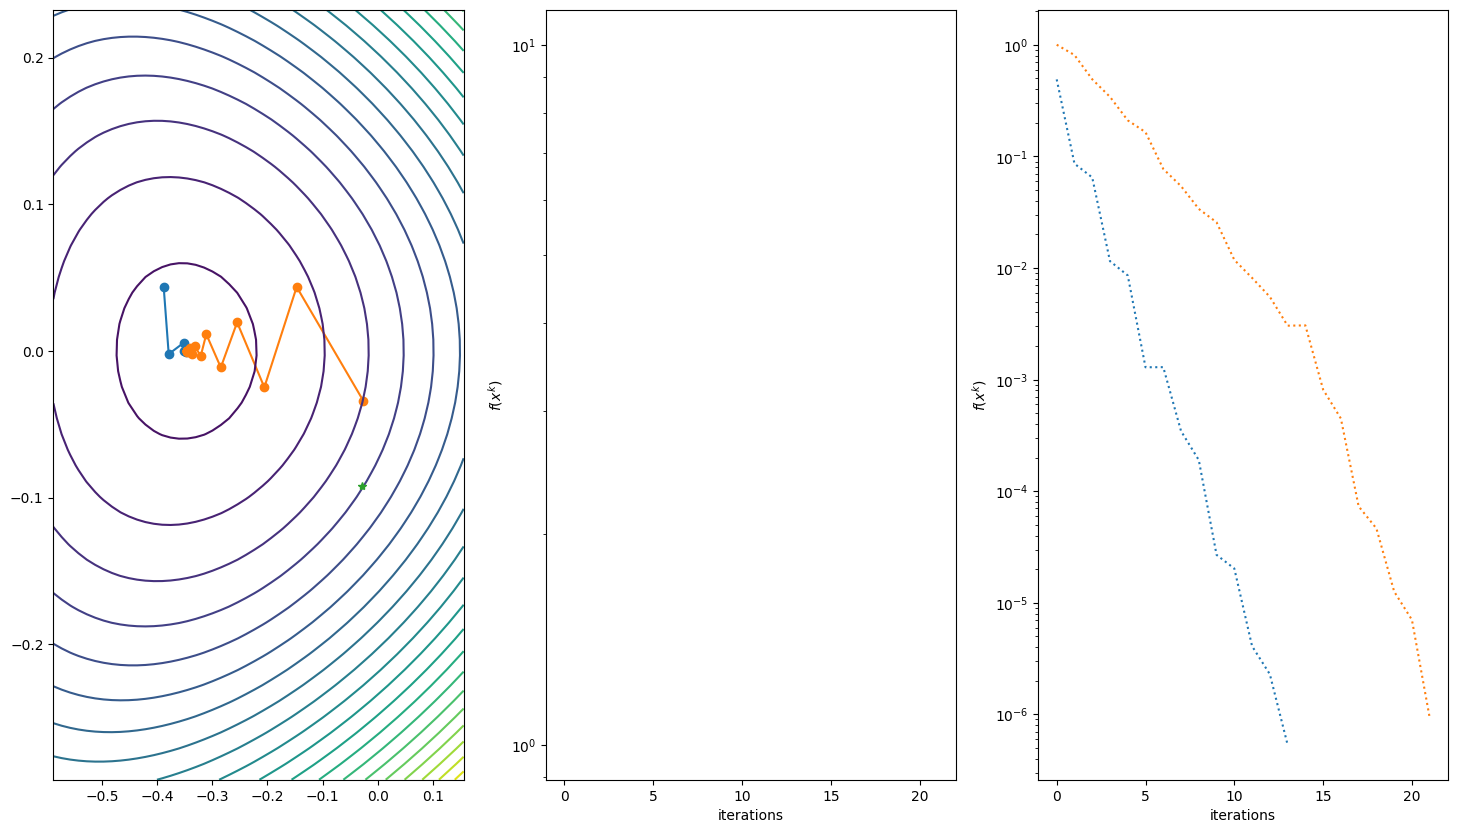

In [80]:
Lambda = np.array((5,1))
np.random.seed(seed=1)
P,q,r= quadratic_problem2d(Lambda)
# check solution existency 
xstar = -np.dot(np.linalg.inv(P),q)
fmin  = cost(xstar)


#grid
ax= xstar[0]
bx = xstar[0]
ay= xstar[1]
by = xstar[1]

for test in range(2):
    x0 = np.copy(xstar) + 2.*(np.random.rand(2)-.5)
    #
 
    xlist,flist,nlist =  methode_desscente(x0,cost,gradient,1e-4)
    xlist = np.asarray(xlist)
    #
    plt.figure(figsize=(18,10))
    fig = plt.figure(1) 
    plt.subplot(1,3,1)
    plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
#    #
    ax = np.min((xlist[:,0].min(),ax))-.1
    bx = np.max((xlist[:,0].max(),bx))+.1
    ay = np.min((xlist[:,1].min(),ay))-.1
    by = np.max((xlist[:,1].max(),by))+.1
    
    plt.subplot(1,3,2)
    plt.semilogy(range(len(flist)),flist-fmin+1e-16)
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    plt.subplot(1,3,3)
    plt.semilogy(nlist,':')
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    
#    
xgrid = np.arange(ax,bx,(bx-ax)/50)
ygrid = np.arange(ay,by,(by-ay)/50)
X, Y = np.meshgrid(xgrid, ygrid)
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

plt.subplot(1,3,1)
plt.contour(X, Y, Z,21)

plt.plot(xstar[0], xstar[1],'*',label='points')
plt.show()

In [49]:
def steepest_descent(x0,cost,gradient,step,epsilon=1e-6,max_iter=1e5):
    k=0
    xlist=[]
    flist=[]
    nlist=[]
    while np.linalg.norm(gradient(x0))>epsilon and k<max_iter:
        d_k=-gradient(x0)
        x0=x0+step*d_k
        k=k+1
        nlist.append(np.linalg.norm(gradient(x0)))
        xlist.append(x0)
        flist.append(cost(x0)) 
    return xlist,flist,nlist

<Figure size 1800x1000 with 0 Axes>

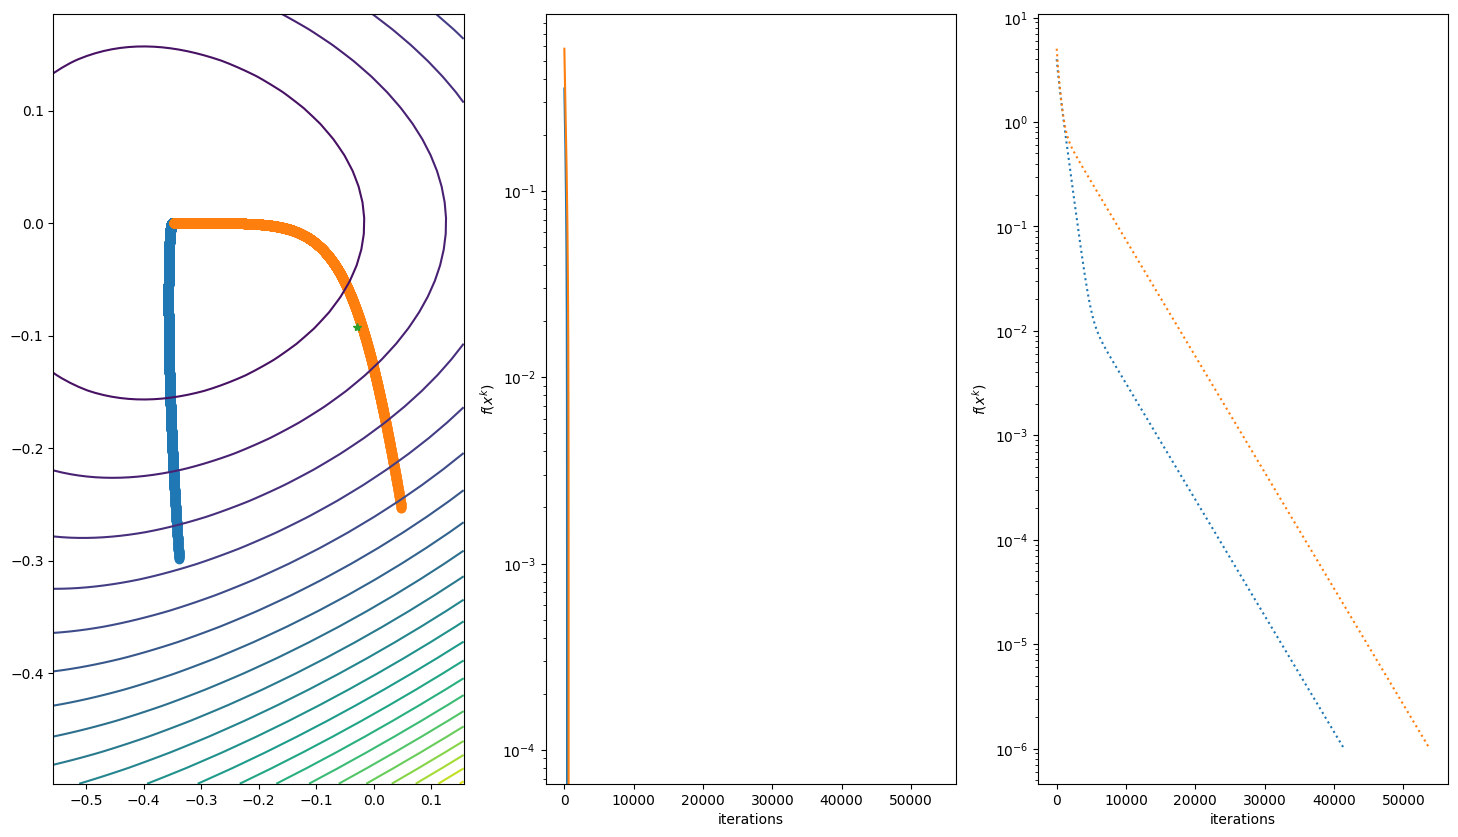

In [50]:
Lambda = np.array((5,1))
np.random.seed(seed=1)
P,q,r= quadratic_problem2d(Lambda)
# check solution existency 
xstar = -np.dot(np.linalg.inv(P),q)
fmin  = cost(xstar)


#grid
ax= xstar[0]
bx = xstar[0]
ay= xstar[1]
by = xstar[1]

for test in range(2):
    x0 = np.copy(xstar) + 2.*(np.random.rand(2)-.5)
    #
 
    xlist,flist,nlist =  steepest_descent(x0,cost,gradient,1e-4)
    xlist = np.asarray(xlist)
    #
    plt.figure(figsize=(18,10))
    fig = plt.figure(1) 
    plt.subplot(1,3,1)
    plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
#    #
    ax = np.min((xlist[:,0].min(),ax))-.1
    bx = np.max((xlist[:,0].max(),bx))+.1
    ay = np.min((xlist[:,1].min(),ay))-.1
    by = np.max((xlist[:,1].max(),by))+.1
    
    plt.subplot(1,3,2)
    plt.semilogy(range(len(flist)),flist-fmin+1e-16)
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    plt.subplot(1,3,3)
    plt.semilogy(nlist,':')
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    
#    
xgrid = np.arange(ax,bx,(bx-ax)/50)
ygrid = np.arange(ay,by,(by-ay)/50)
X, Y = np.meshgrid(xgrid, ygrid)
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

plt.subplot(1,3,1)
plt.contour(X, Y, Z,21)

plt.plot(xstar[0], xstar[1],'*',label='points')
plt.show()

In [54]:
def test(x):
    return x**2

In [55]:
a=test
a(5)

25